In [60]:
#coding utf-8

# DEFINIÇÃO DE VARIÁVEIS DO USUÁRIO

# Altere esse variável para definir a imagem a ser avaliada. 
# A imagem deve ser uma microestrutura bifásica.
# A imagem padrão é uma Micrografia de Ferro Cinzento. Vá à 4a célula para acompanhar o funcionamento
# detalhado do programa. Na última célula temos o resultado da análise.
NOME_DA_IMAGEM_A_SER_ANALISADA = "FromDoItPoms000288.jpg"
NOME_DA_FASE_ESCURA = "Fase Escura"
NOME_DA_FASE_CLARA  = "Fase Clara"

# número de pixels da borda
BORDA_ESQUERDA = 5
BORDA_DIREITA = 5
BORDA_SUPERIOR = 5
BORDA_INFERIOR = 80

# Valor que define o limiar de corte de 0(preto) a 1(branco)
VALOR_DE_CORTE = 0.6 # valor de 0 a 1.


In [61]:
# SETUP

get_ipython().magic('matplotlib inline')

import math
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, data

from collections import Counter


#import os
from skimage import io

# função de convolução bidimensional, vamos referenciar a função pelo
# apelido conv2
from scipy.signal import convolve2d as conv2





In [62]:
def mostra_imagem_cinza(data):
  """Uma função auxiliar para exibir uma imagem em níveis de cinza"""
  f = plt.figure()
  ax_img = f.gca()
  ax_img.imshow(data, cmap=plt.cm.gray)
  ax_img.set_axis_off()
  return (f, ax_img)

def load_image(img_name):
    #filename = os.path.join(skimage.data_dir, img_name)
    #print(filename)
    return io.imread(img_name)

def imagem_cinza(imagem_colorida):
    return color.rgb2gray(imagem)

def segmenta_imagem(imagem, valor_de_corte):
    linhas, colunas = imagem.shape
    matrizUns = np.ones((linhas, colunas), dtype=float)
    cor_media = valor_de_corte*matrizUns
    return imagem > cor_media

def gera_matriz(dimensao):
    return np.ones((dimensao, dimensao), dtype=np.float32)/(dimensao*dimensao)

def histograma(imagem):
    freq = Counter(np.array(imagem).flatten())
    return freq

def conta_pixel_por_valor(imagem, valor=255):
    freq = Counter(np.array(imagem).flatten())
    return freq[valor]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xed75e10>)

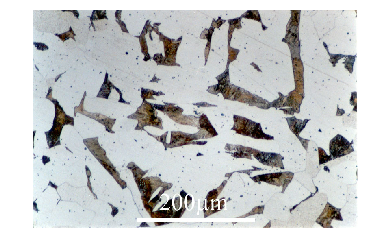

In [63]:
# A imagem base a ser analisada é a "FromDoItPoms000288.jpg". 
# Essa imagem foi obtida de: https://www.doitpoms.ac.uk/miclib/full_record.php?id=288
micrografia_colorida = load_image(NOME_DA_IMAGEM_A_SER_ANALISADA)

# Ela pode ser observada abaixo:
mostra_imagem_cinza(micrografia_colorida)

# O objetivo desse Quantificador é calcular a quantidade de duas fases distintas
# existentes na amostra estudada. Através da Estereologia Quantitativa,
# sabemos que a quantidade de cada uma dessas fases no material é proporcional à quantidade
# das fases na amostra.

# Uma fase será a fase clara.
# A outra será a fase escura.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xec8aa20>)

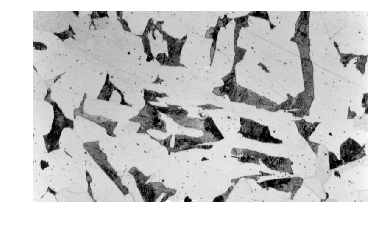

In [64]:
# Trabalharemos com a imagem em níveis de cinza, pois as cores são irrelevantes.
img_cinza = color.rgb2gray(micrografia_colorida)

# Iremos retirar a parte debaixo da imagem, onde consta a legenda, para que ela
# não atrapalhe nossa contagem. 
linhas,colunas = img_cinza.shape

# Se O usuário quiser verificar outros valores de borda, pode 
# descomentar as linhas abaixo para facilitar a análise do corte.
#BORDA_ESQUERDA = 5
#BORDA_DIREITA = 5
#BORDA_SUPERIOR = 5
#BORDA_INFERIOR = 80

imagem_cortada = img_cinza[BORDA_SUPERIOR:linhas-BORDA_INFERIOR, 
                           BORDA_ESQUERDA:colunas-BORDA_DIREITA]

mostra_imagem_cinza(imagem_cortada)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xeccce80>)

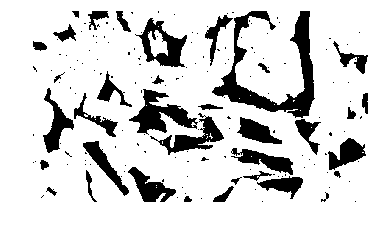

In [65]:
# Agora iremos separar a imagem. Todos os pixels com mais de 60% de intensidade serão brancos,
# todos os pixels com intensidade menor que 60% serão pretos.

# Se o usuário quiser experimentar com outros valroes de corte, pode descomentar a linha
# abaixo para facilitar a análise das alterações.
#VALOR_DE_CORTE = 0.6 # valor de 0 a 1.

im_dual = segmenta_imagem(imagem_cortada, VALOR_DE_CORTE)
mostra_imagem_cinza(im_dual)

# Note que há pontos brancos dentro das áreas pretas, e pontos pretos nas áreas brancas. Nós 
# NÃO queremos removê-los, pois se tratam de impurezas(e não ruído).

In [66]:
# Agora, podemos utilizar uma simples contagem de pixels e determinar a quantidade de cada fase:
# Fase Escura: Contagem de pixels pretos.
# Fase Clara: Contagem de pixels brancos.

fase_escura = conta_pixel_por_valor(im_dual, 0)
fase_clara = conta_pixel_por_valor(im_dual, 1.0)
numero_total_de_pontos = fase_escura+fase_clara

fase_escura = 100*fase_escura/numero_total_de_pontos
fase_clara = 100*fase_clara/numero_total_de_pontos

print("Essa micrografia apresenta cerca de \n\t%.2f%%  de %s \n\t%.2f%%  de %s." %(fase_clara, NOME_DA_FASE_CLARA, fase_escura, NOME_DA_FASE_ESCURA));


Essa micrografia apresenta cerca de 
	77.26%  de Fase Clara 
	22.74%  de Fase Escura.
